## What are my drivers for this project?
## What are some possible reasons for churning.
- Does online backup cause a churn
- Does internet service type cause a churn
- Does device protection cause a churn or matter
- Does having online secuirty  cause a churn

## Lets aquire the data and take a look at the table

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
import env
import acquire
import prepare
import explore

In [2]:
#acquiring telco data using the acquire 
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
#just looking at all the info for the columns and there dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
#here we are preparing our data by 

In [5]:
# determined that customer id has no relevance it maybe an index 
df.drop(columns='customer_id', inplace=True)


In [6]:
# Drop null values stored as whitespace    
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,Male,0,No,No,4,Yes,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [7]:
df.payment_type.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [8]:
df['payment_type'] = df['payment_type'].str.replace(' (automatic)', '')

In [9]:
df.payment_type.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  online_security           7043 non-null   object 
 11  online_backup             7043 non-null   object 
 12  device_protection         7043 non-null   object 
 13  tech_support              7043 non-null   object 
 14  streamin

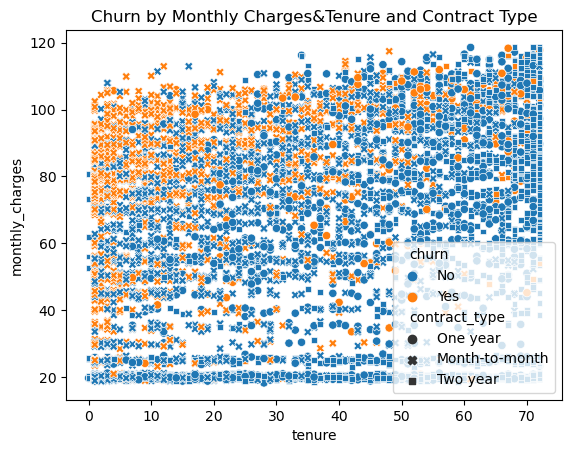

In [11]:
# Scatterplot with monthly charges, tenure, and contract type separated by churn 

sns.scatterplot(x='tenure', y='monthly_charges', data=df, hue='churn', style='contract_type')

plt.title('Churn by Monthly Charges&Tenure and Contract Type')
plt.show()

In [12]:
def churn_overall(df):
    # create a figure
    fig = plt.figure(figsize=(12, 6)) 
    ax = fig.add_subplot(111)

    # proportion of observation of each class
    prop_response = df['churn'].value_counts(normalize=True)

    # create a bar plot showing the percentage of churn
    prop_response.plot(kind='bar', 
                    ax=ax,
                    color= ['#1f77b4', '#ff7f0e'])


    # set title and labels
    ax.set_title('Proportion of observations of the response variable',
                fontsize=18)
    ax.set_xlabel('churn',
                fontsize=14)
    ax.set_ylabel('proportion of observations',
                fontsize=14)
    ax.tick_params(rotation='auto')




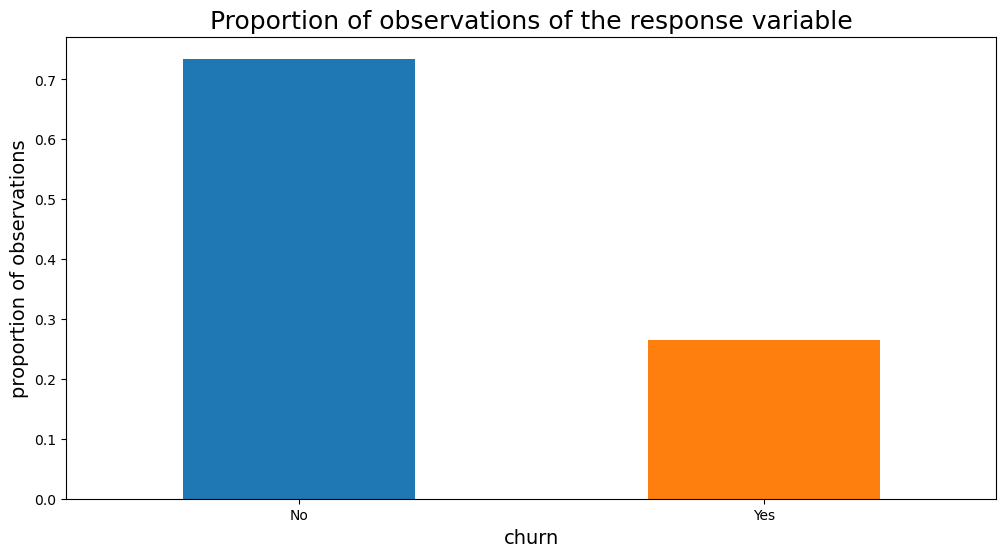

In [13]:
churn_overall(df)

In [14]:
#this is show the percent of times yes and no of churn
print((df['churn'] == 'No').mean())
print((df['churn'] == 'Yes').mean())

0.7346301292063041
0.2653698707936959


In [15]:
# I want to split the churns between yes and no's and the cat_cols / nums_cols
# separating our numeric and categorical columns:


In [16]:
# I want to split the churns between yes and no's and the cat_cols / nums_cols
# separating our numeric and categorical columns:

cat_cols, num_cols = [], []

for col in df:
    if df[col].dtype == 'O':
         cat_cols.append(col)
    else:
        if df[col].nunique() < 10:
            cat_cols.append(col)
        else:
             num_cols.append(col)

In [17]:
num_cols

['tenure', 'monthly_charges']

In [18]:
cat_cols

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

## Online Security Chi squared test

# $H_0$: Online secuirty is a cause of churn

# $H_a$: Online security is not casue of churn 


In [19]:
alpha = .05

In [20]:
# dropped No internet service from the crosstab
on_sec = df.online_security[df.online_security != 'No internet service']

In [21]:
on_sec_obs = pd.crosstab(df.churn, on_sec)

In [22]:
chi2, p, degf, expected = stats.chi2_contingency(on_sec_obs)
chi2, p, degf, expected

(433.8080619245688,
 2.4103054690052725e-96,
 1,
 array([[2384.62533986, 1376.37466014],
        [1113.37466014,  642.62533986]]))

In [23]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(on_sec_obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 3 digits. 
print(f'chi^2 = {chi2:.3f}') 

# print the p-value, formatted to a float with 3 digits. 
print(f'p= {p:.3f}')

Observed Values

[[2037 1724]
 [1461  295]]
---
Expected Values

[[2384 1376]
 [1113  642]]
---

chi^2 = 433.808
p= 0.000


In [24]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## tech_support Chi squared test

# $H_0$: tech_support is a cause of churn

# $H_a$: tech_support is not casue of churn 

In [25]:
on_tech = df.tech_support[df.tech_support != 'No internet service']
on_tech_obs = pd.crosstab(df.churn, on_tech)
chi2, p, degf, expected4 = stats.chi2_contingency(on_tech_obs)
chi2, p, degf, expected4
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(on_tech_obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected4.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 3 digits. 
print(f'chi^2 = {chi2:.3f}') 

# print the p-value, formatted to a float with 3 digits. 
print(f'p     = {p:.3f}')

Observed Values

[[2027 1734]
 [1446  310]]
---
Expected Values

[[2367 1393]
 [1105  650]]
---

chi^2 = 414.252
p     = 0.000


In [26]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Device Protection Chi Squared Test

# $H_0$: device protection is a cause of churn

# $H_a$: device protection is not casue of churn 

In [27]:
on_dev = df.device_protection[df.device_protection != 'No internet service']
on_dev_obs = pd.crosstab(df.churn, on_dev)
chi2, p, degf, expected3 = stats.chi2_contingency(on_dev_obs)
chi2, p, degf, expected3
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(on_dev_obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected3.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 3 digits. 
print(f'chi^2 = {chi2:.3f}') 

# print the p-value, formatted to a float with 3 digits. 
print(f'p     = {p:.3f}')

Observed Values

[[1884 1877]
 [1211  545]]
---
Expected Values

[[2109 1651]
 [ 985  770]]
---

chi^2 = 172.321
p     = 0.000


In [28]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


Online backup Chi Squared test

# $H_0$: online_backup is the cause of churn
# $H_a$: online_backup is not the cause of churn

In [29]:
on_back = df.online_backup[df.online_backup != 'No internet service']

In [30]:
on_back_obs = pd.crosstab(df.churn, on_back)

In [31]:
chi2, p, degf, expected2 = stats.chi2_contingency(on_back_obs)
chi2, p, degf, expected2
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(on_back_obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected2.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 3 digits. 
print(f'chi^2 = {chi2:.3f}') 

# print the p-value, formatted to a float with 3 digits. 
print(f'p     = {p:.3f}')


Observed Values

[[1855 1906]
 [1233  523]]
---
Expected Values

[[2105 1655]
 [ 982  773]]
---

chi^2 = 211.226
p     = 0.000


In [32]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [33]:
df.head(1)

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check


## Internet service type Chi Squared test

# $H_0$: internet service type is the cause of churn
# $H_a$: internet service type is not the cause of churn

In [34]:
int_service_obs = pd.crosstab(df.churn, df.internet_service_type)
int_service_obs

internet_service_type,DSL,Fiber optic,None
churn,,,
No,1962,1799,1413
Yes,459,1297,113


In [35]:
int_service_obs = pd.crosstab(df.churn, df.internet_service_type)
chi2, p, degf, expected5 = stats.chi2_contingency(int_service_obs)
chi2, p, degf, expected5
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(int_service_obs.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected5.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 3 digits. 
print(f'chi^2 = {chi2:.3f}') 

# print the p-value, formatted to a float with 3 digits. 
print(f'p     = {p:.3f}')

Observed Values

[[1962 1799 1413]
 [ 459 1297  113]]
---
Expected Values

[[1778 2274 1121]
 [ 642  821  404]]
---

chi^2 = 732.310
p     = 0.000


In [36]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [37]:
# I want to get dummy values for online security, online backup, device protection, abd tech support

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,Male,0,No,No,4,Yes,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [38]:
df_telco = acquire.get_telco_data()

In [39]:
df_telco

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [40]:
df_clean = prepare.prep_telco(df_telco)

In [41]:
df_clean

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,tech_support_No internet service,tech_support_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.60,593.30,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.90,542.40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.90,280.85,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0011-IGKFF,1,13,98.00,1237.85,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,3,83.90,267.40,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,55.15,742.90,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
7039,9992-RRAMN,0,22,85.10,1873.70,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,0,2,50.30,92.75,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,0,67,67.85,4627.65,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [42]:
train, validate, test = prepare.split_telco_data(df_clean, 'churn_Yes')


Train: 0.5598466562544371
Validate: 0.24009654976572484
Test: 0.20005679397983814


In [43]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,tech_support_No internet service,tech_support_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4630,6527-PZFPV,0,24,20.80,469.65,1,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0
1566,2277-AXSDC,0,32,19.75,624.15,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,0
3294,4701-MLJPN,0,31,55.25,1715.65,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
120,0208-BPQEJ,0,12,19.40,198.10,1,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
2761,3932-CMDTD,0,4,105.65,443.90,0,0,0,1,0,...,0,1,1,1,0,1,0,0,1,0


# Modeling part

In [44]:
train['churn_Yes'].value_counts()

0    2897
1    1046
Name: churn_Yes, dtype: int64

In [45]:
# setting a basline accuracy 
baseline_accuracy = (train['churn_Yes'] == 0).mean()
baseline_accuracy

0.7347197565305605

In [46]:
# Split data into x and y sets
X_train = train.drop(columns=['churn_Yes','customer_id', 'senior_citizen'])
X_validate = validate.drop(columns=['churn_Yes','customer_id', 'senior_citizen'])
X_test = test.drop(columns=['churn_Yes','customer_id', 'senior_citizen'])
y_train = train['churn_Yes']
y_validate = validate['churn_Yes'] 
y_test = test['churn_Yes']

X_train

,tenure,monthly_charges,total_charges,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4630,24,20.80,469.65,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0
1566,32,19.75,624.15,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
3294,31,55.25,1715.65,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
120,12,19.40,198.10,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0
2761,4,105.65,443.90,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,72,92.00,6632.75,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
4687,71,58.65,4145.25,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
1521,1,55.20,55.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6552,3,74.25,210.30,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Starting with a depth of 4 to have something to check the For Loop on.

In [47]:
tree = DecisionTreeClassifier(random_state=7, max_depth=4)
tree

DecisionTreeClassifier(max_depth=4, random_state=7)

In [48]:
tree = tree.fit(X_train,y_train)
tree

DecisionTreeClassifier(max_depth=4, random_state=7)

#  finding the accuracy, tp rate, fp rate, tn rate, fn rate, precision, recall, f1-score, and support.



In [49]:
def metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [50]:
# using the confustion matrix 

confuse = confusion_matrix(y_train,tree.predict(X_train))
TN, FP, FN, TP = confuse.ravel()
TN, FP, FN, TP 

(2512, 385, 408, 638)

In [51]:
# running the function with confusion matrix
metrics(TN,FP,FN,TP)

Accuracy: 0.7988840984022318

True Positive Rate/Sensitivity/Recall/Power: 0.609942638623327
False Positive Rate/False Alarm Ratio/Fall-out: 0.13289609941318606
True Negative Rate/Specificity/Selectivity: 0.867103900586814
False Negative Rate/Miss Rate: 0.390057361376673

Precision/PPV: 0.6236559139784946
F1 Score: 0.6167230546157564

Support (0): 1046
Support (1): 2897


In [52]:
def get_metrics(model,xtrain,ytrain,xtest,ytest):
    
    labels = sorted(y_train.unique())

    # OUTPUTS AN ARRAY OF PREDICTIONS
    preds = model.predict(xtest)
    print("Accuracy Score:", model.score(xtest,ytest))
    print()
    print('Confusion Matrix:')
    conf = confusion_matrix(ytest,preds)
    conf = pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])
    print(conf)
    print()
    print("Classification Report:")
    print(classification_report(ytest, preds))

In [53]:
get_metrics(tree, X_train,y_train,X_train,y_train)

Accuracy Score: 0.7988840984022318

Confusion Matrix:
          0_predict  1_predict
0_actual       2512        385
1_actual        408        638

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2897
           1       0.62      0.61      0.62      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.74      0.74      3943
weighted avg       0.80      0.80      0.80      3943



In [54]:
scores_all = []

for x in range(1,20):

    tree = DecisionTreeClassifier(max_depth=x, random_state=7)
    tree.fit(X_train, y_train)
    
    # evaluate on train
    train_acc = tree.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = tree.score(X_validate, y_validate)

    # diff between train & val
    diff_acc = train_acc - val_acc
    
    scores_all.append([x, train_acc, val_acc, diff_acc])

    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_accuracy','val_accuracy', 'diff_accuracy'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_accuracy','val_accuracy', "diff_accuracy"])
scores_df.sort_values(by=['val_accuracy'], ascending=False).head(20)

,max_depth,train_accuracy,val_accuracy,diff_accuracy
2,3,0.793812,0.787108,0.006704
1,2,0.793812,0.787108,0.006704
4,5,0.809536,0.785925,0.023610
5,6,0.817398,0.781195,0.036203
6,7,0.825260,0.779420,0.045839
3,4,0.798884,0.778829,0.020055
7,8,0.844281,0.762271,0.082010
8,9,0.861273,0.754583,0.106690
9,10,0.885620,0.742164,0.143456
12,13,0.943444,0.734477,0.208967


## With a mx depth of four our loop above is working 

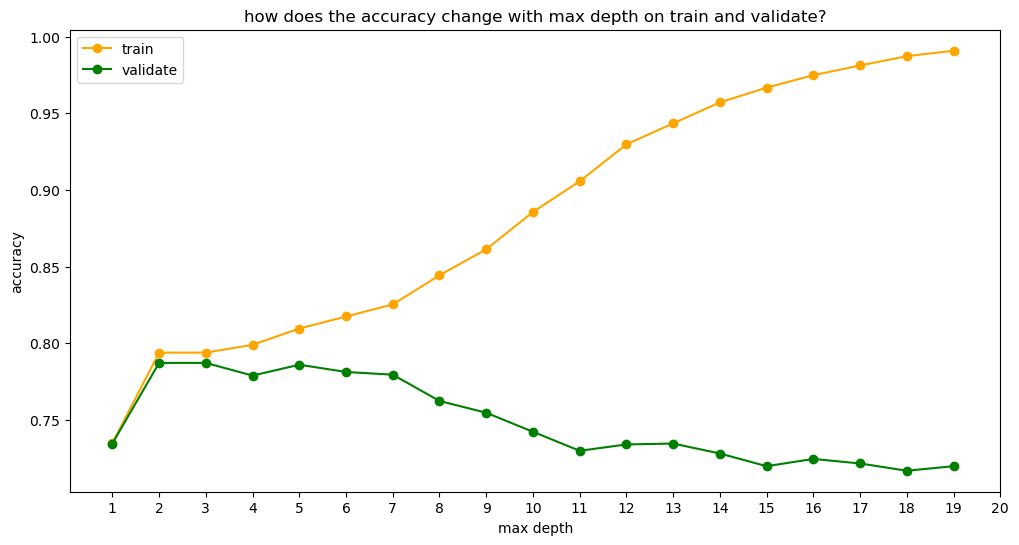

In [55]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_accuracy, label='train', marker='o',color = "orange")
plt.plot(scores_df.max_depth, scores_df.val_accuracy, label='validate', marker='o',color = 'green')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

## Model four appear to be the best if we go with Decision tree. it goes down the in accuracy 

## RF Model

In [56]:
rf = RandomForestClassifier(random_state=7, min_samples_leaf=8, max_depth=3)
rf.fit(X_train, y_train)
print(f' Accuracy of Random Forest on train data is {rf.score(X_train, y_train)}')
print(f' Accuracy of Random Forest on train data is {rf.score(X_validate, y_validate)}')

 Accuracy of Random Forest on train data is 0.789753994420492
 Accuracy of Random Forest on train data is 0.7835600236546422


In [57]:
rf = RandomForestClassifier(random_state=7, min_samples_leaf=8, max_depth=4)

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=8, random_state=7)

In [59]:
get_metrics(rf, X_train, y_train, X_train, y_train)

Accuracy Score: 0.797616028404768

Confusion Matrix:
          0_predict  1_predict
0_actual       2702        195
1_actual        603        443

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2897
           1       0.69      0.42      0.53      1046

    accuracy                           0.80      3943
   macro avg       0.76      0.68      0.70      3943
weighted avg       0.78      0.80      0.78      3943



In [60]:
confu = confusion_matrix(y_train,rf.predict(X_train))
TN, FP, FN, TP = confu.ravel()
TN, FP, FN, TP

(2702, 195, 603, 443)

In [62]:
metrics(TN, FP, FN, TP)

Accuracy: 0.797616028404768

True Positive Rate/Sensitivity/Recall/Power: 0.4235181644359465
False Positive Rate/False Alarm Ratio/Fall-out: 0.06731101139109423
True Negative Rate/Specificity/Selectivity: 0.9326889886089058
False Negative Rate/Miss Rate: 0.5764818355640535

Precision/PPV: 0.6943573667711599
F1 Score: 0.5261282660332541

Support (0): 1046
Support (1): 2897


In [ ]:
 scores_all = []

for x in range(1,11):
        
        # looping through min_samples front to back 
        # looping through max_depth back to front
        rf = RandomForestClassifier(random_state=7, min_samples_leaf=x, max_depth=11-x) # different if x = 10 vs x = 1
        #fit it
        rf.fit(X_train, y_train)
        #transform 
        train_acc = rf.score(X_train, y_train)
        
        #evaluate on my validate data
        val_acc = rf.score(X_validate, y_validate)
        diff_acc = train_acc - val_acc
        scores_all.append([x, 11-x, train_acc, val_acc, diff_acc])

        
        
scores_df = pd.DataFrame(scores_all, columns =['min_samples','max_depth','train_accuracy','val_accuracy', 'diff_accuracy'])
scores_df.sort_values('diff_accuracy', ascending=True)

In [ ]:
#creat a function for viz for the random forest model

def plot_forest():  
    plt.figure(figsize=(12,6))
    plt.plot(scores_df.max_depth, scores_df.train_accuracy, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.val_accuracy, label='validate', marker='o')
    plt.xlabel('max depth and min leaf sample')
    plt.ylabel('accuracy')

    plt.xticks([1,2,3,4,5,6,7,8,9,10],
            [('1 and 10'),('2 and 9'),('3 and 8'),('4 and 7'),('5 and 6'),
            ('6 and 5'),('7 and 4'), ('8 and 3'), ('9 and 2'), ('10 and 1') ]
            )

    plt.title('how does the accuracy change with hyper parameter tuning on train and validate?')
    plt.legend()
    plt.show()

In [ ]:
plot_forest()

For RF, I would use the max depth of 4 and min_leaf sample of 8 due to the higher percentage in both the train and validate and a minimal difference between them

## KNN 

In [63]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
X_train.values

array([[2.40000e+01, 2.08000e+01, 4.69650e+02, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.20000e+01, 1.97500e+01, 6.24150e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.10000e+01, 5.52500e+01, 1.71565e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 5.52000e+01, 5.52000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.00000e+00, 7.42500e+01, 2.10300e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.10000e+01, 5.45500e+01, 6.01250e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [69]:
y_pred = knn.predict(X_train.values)



In [72]:
y_pred_proba = knn.predict_proba(X_train.values)

In [75]:
knn.score(X_train.values, y_train.values)

0.8255135683489728

In [76]:
conmatrix = confusion_matrix(y_train, y_pred)

In [79]:
conmatrix_disp = ConfusionMatrixDisplay(conmatrix, display_labels=knn.classes_)

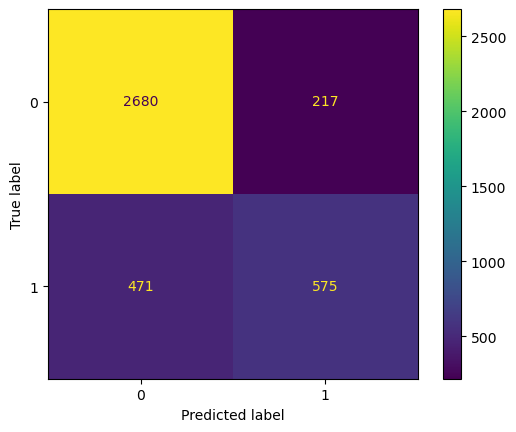

In [80]:
conmatrix_disp.plot()
plt.show()

In [83]:
get_metrics(knn, X_train.values, y_train.values, X_train.values, y_train.values)

Accuracy Score: 0.8255135683489728

Confusion Matrix:
          0_predict  1_predict
0_actual       2680        217
1_actual        471        575

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2897
           1       0.73      0.55      0.63      1046

    accuracy                           0.83      3943
   macro avg       0.79      0.74      0.76      3943
weighted avg       0.82      0.83      0.82      3943

